In [22]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
cali=pd.read_csv('/content/sample_data/california_housing_train.csv')

In [6]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [7]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [8]:
cali.shape

(17000, 9)

# EDA

In [9]:
#check any missing data
cali.isnull().sum()/cali.shape[0]*100

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
dtype: float64

# Data Visualization

<Figure size 720x720 with 0 Axes>

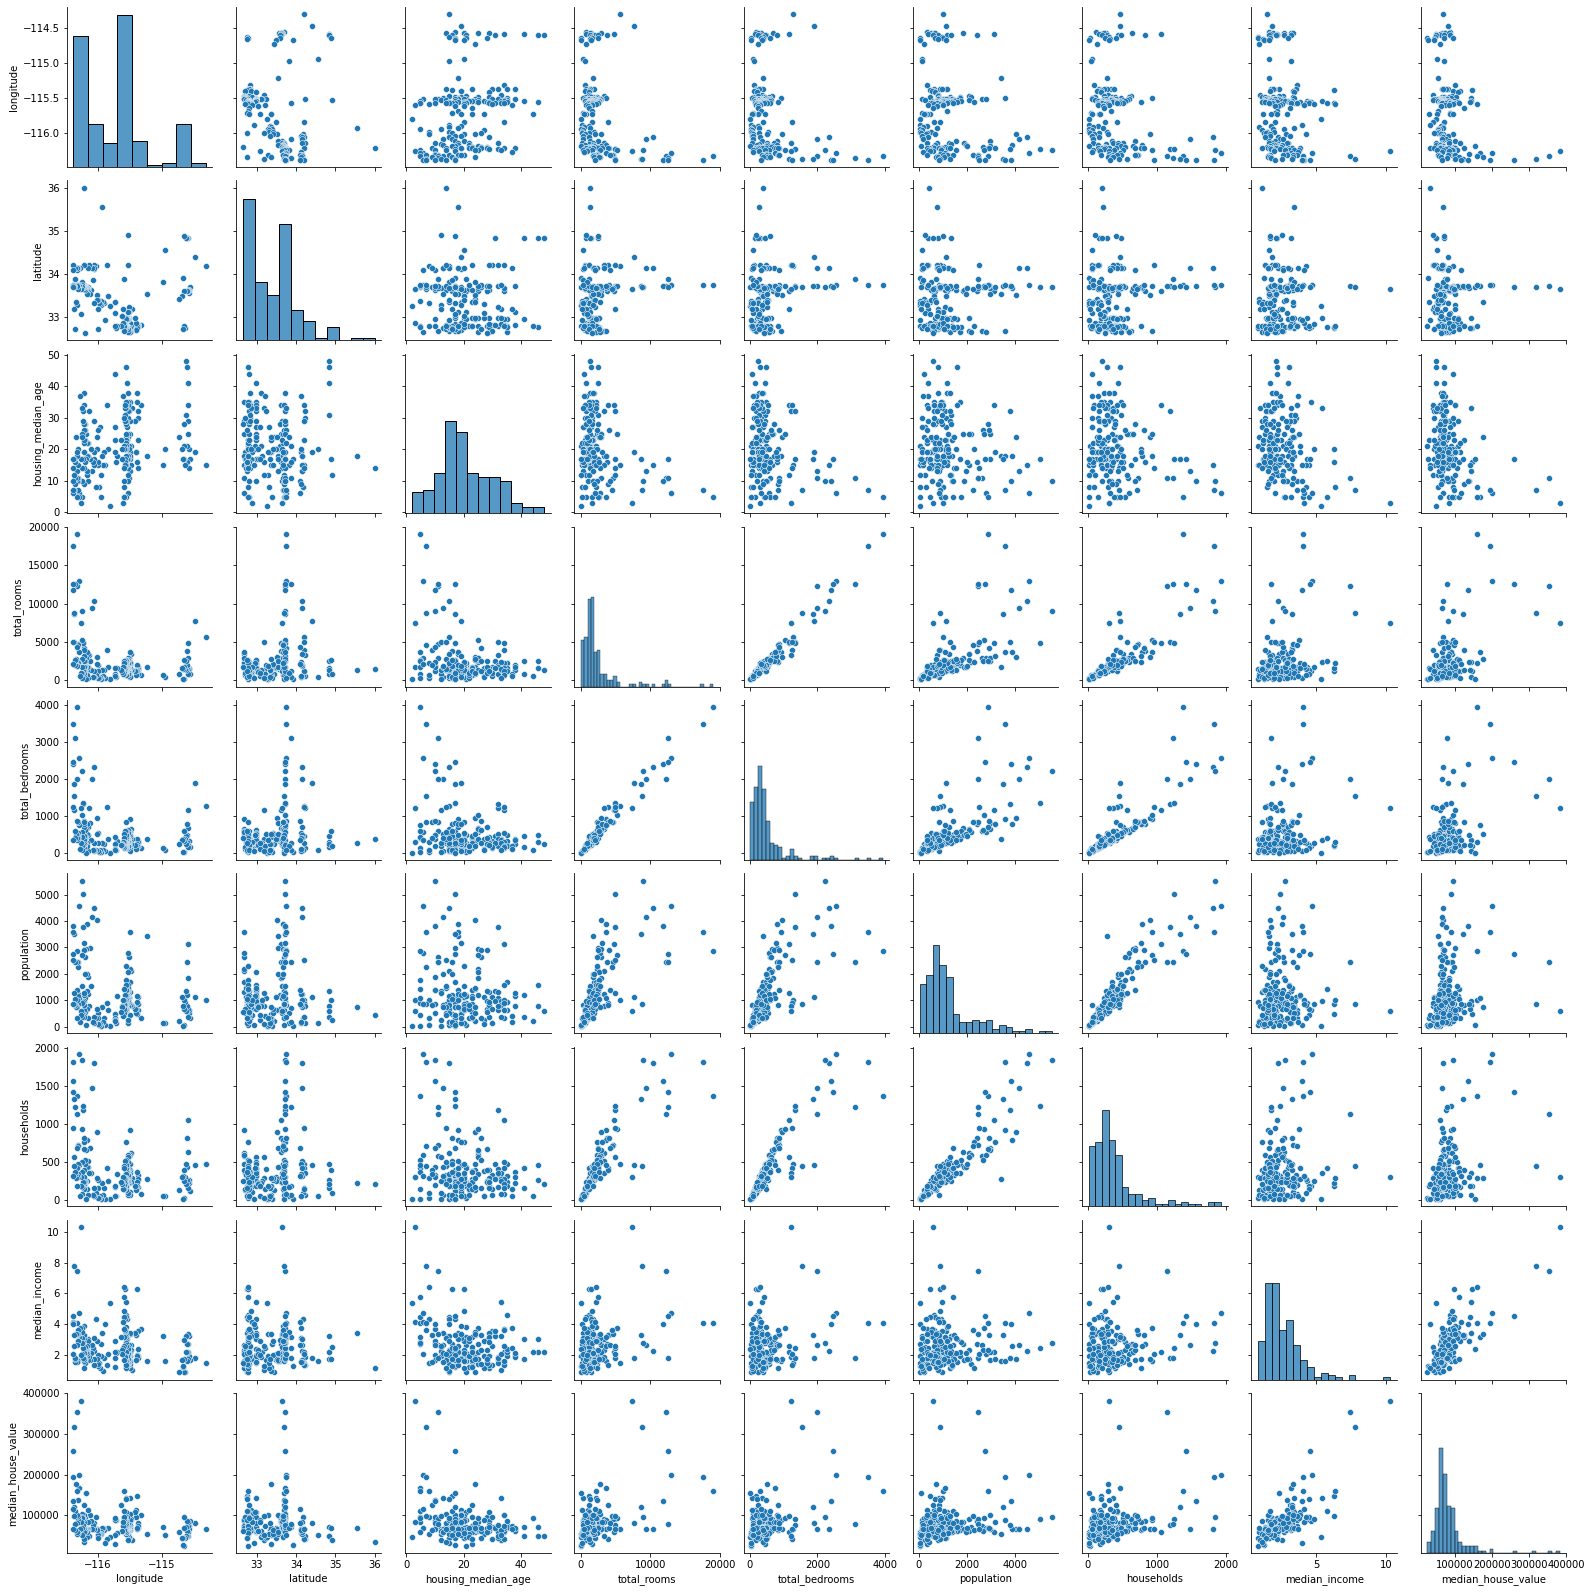

In [11]:
fig=plt.figure(figsize=(10,10))
sns.pairplot(cali.iloc[:200,:])

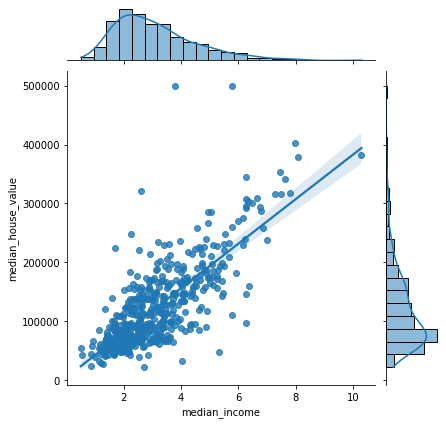

In [10]:
sns.jointplot(data=cali.iloc[:500,:], x='median_income', y='median_house_value', kind='reg')

In [11]:
cali_corr=cali.iloc[:500,:].corr()
cali_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.018761,0.172291,-0.294610,-0.250780,-0.260851,-0.302271,-0.317422,-0.451594
latitude,-0.018761,1.000000,-0.041175,0.153552,0.199914,-0.030656,0.044788,-0.241048,-0.248336
housing_median_age,0.172291,-0.041175,1.000000,-0.307949,-0.268963,-0.214776,-0.236708,-0.239956,-0.208535
total_rooms,-0.294610,0.153552,-0.307949,1.000000,0.969927,0.770616,0.877106,0.192453,0.276463
total_bedrooms,-0.250780,0.199914,-0.268963,0.969927,1.000000,0.773327,0.890528,0.033156,0.149062
population,-0.260851,-0.030656,-0.214776,0.770616,0.773327,1.000000,0.928565,0.024564,0.075698
households,-0.302271,0.044788,-0.236708,0.877106,0.890528,0.928565,1.000000,0.016170,0.115259
median_income,-0.317422,-0.241048,-0.239956,0.192453,0.033156,0.024564,0.016170,1.000000,0.764761
median_house_value,-0.451594,-0.248336,-0.208535,0.276463,0.149062,0.075698,0.115259,0.764761,1.000000


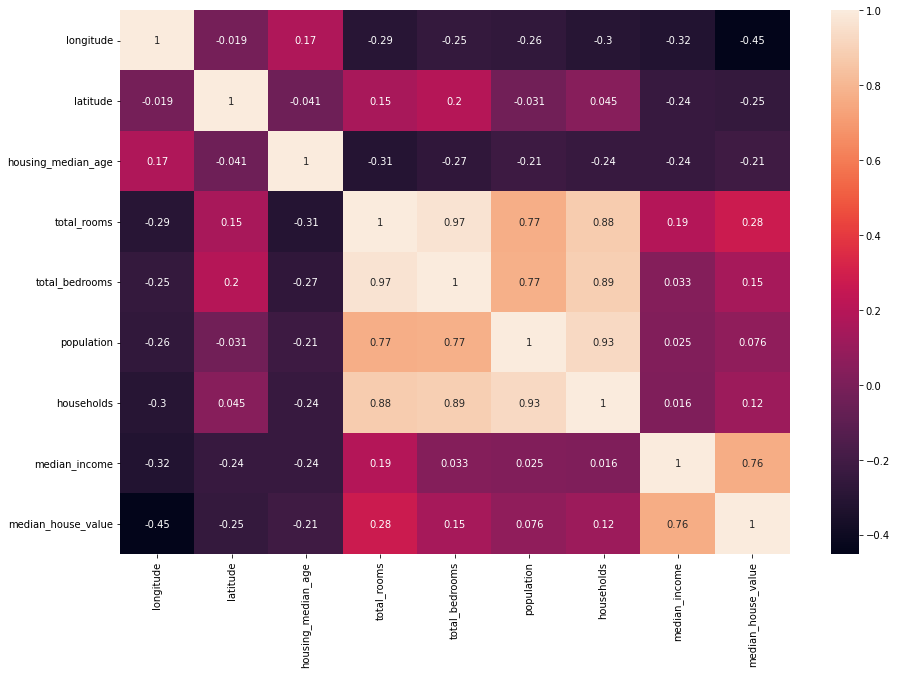

In [12]:
fig=plt.figure(figsize=(15,10))
sns.heatmap(cali_corr, annot=True)

# Prepare the data

In [13]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [14]:
X=cali.drop(['median_house_value'], axis=1)
y=cali['median_house_value']
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


##Split the data 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# With out Scaling the data First

In [16]:
#create a pipe
for i in range(1,3):
  transformer=make_column_transformer((PolynomialFeatures(degree = i), make_column_selector(dtype_include=np.number)))
  pipe = Pipeline([('transformer', transformer), 
                   ('linreg', LinearRegression())])

In [17]:
# on the trained data
pipe.fit(X_train,y_train)
y_train_pred=pipe.predict(X_train)
MSE_train=mean_squared_error(y_train,y_train_pred)
train_score=pipe.score(X_train,y_train)
print(f'the mean square error is: {MSE_train}')
print(f'the train score is: {train_score}')

the mean square error is: 3938337321.8527746
the train score is: 0.7036629322434321


In [18]:
#on the test data
y_test_pred=pipe.predict(X_test)
MSE_test=mean_squared_error(y_test,y_test_pred)
test_score=pipe.score(X_test,y_test)
print(f'the mean square error is: {MSE_test}')
print(f'the train score is: {test_score}')

the mean square error is: 3992376526.614029
the train score is: 0.7109359942985387


# Permutation Importance

In [19]:
r = permutation_importance(pipe, X_test, y_test,n_repeats=3,random_state=42)

In [20]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{cali.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

latitude2.947 +/- 0.053
total_bedrooms2.911 +/- 0.092
longitude2.810 +/- 0.063
total_rooms1.628 +/- 0.038
median_income0.974 +/- 0.016
population0.559 +/- 0.015
households0.208 +/- 0.013
housing_median_age0.072 +/- 0.006


# Scaled data set

In [34]:
#create a pipe
for i in range(1,3):
  pipe_scaler = Pipeline([('poly_features',PolynomialFeatures(degree = i)),
                         ('scaler', StandardScaler()), 
                         ('linreg', LinearRegression())])

In [35]:
# on the trained data
pipe_scaler.fit(X_train,y_train)
y_train_pred=pipe_scaler.predict(X_train)
MSE_train=mean_squared_error(y_train,y_train_pred)
train_score=pipe_scaler.score(X_train,y_train)
print(f'the mean square error is: {MSE_train}')
print(f'the train score is: {train_score}')

the mean square error is: 3938337321.8527646
the train score is: 0.7036629322434329


In [36]:
#on the test data
y_test_pred=pipe_scaler.predict(X_test)
MSE_test=mean_squared_error(y_test,y_test_pred)
test_score=pipe_scaler.score(X_test,y_test)
print(f'the mean square error is: {MSE_test}')
print(f'the train score is: {test_score}')

the mean square error is: 3992376519.265337
the train score is: 0.7109359948306133
